<a href="https://colab.research.google.com/github/nerophung/neu-ai-class-winter-2019/blob/master/mnist_lenet_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice LeNet-5 with MNIST Dataset**

#### Import lib

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AvgPool2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

#### Download data

In [0]:
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# get raw label for visualize data
raw_y_train = y_train.copy()
raw_y_test = y_test.copy()

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### Visualize data

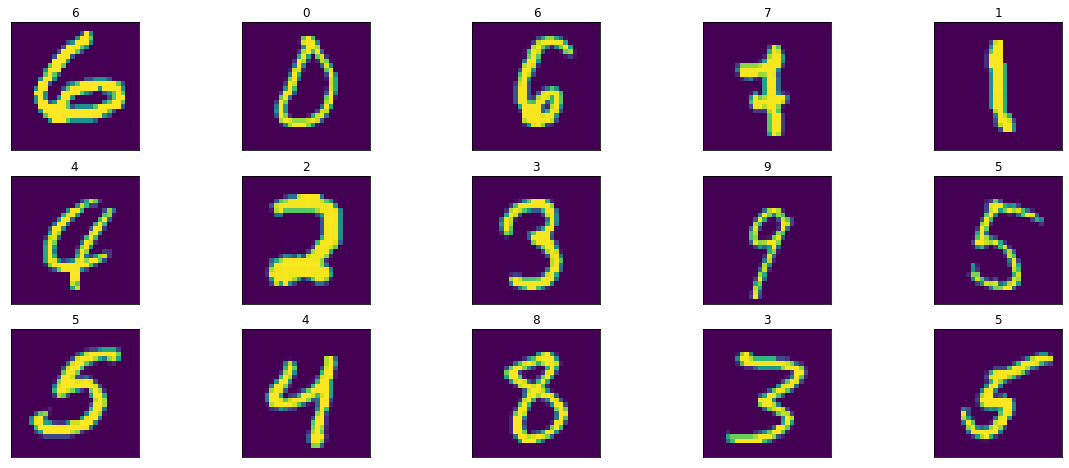

In [0]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_train.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_train[index].reshape(28, 28)))
    # Set the title for each image
    ax.set_title("{}".format(raw_y_train[index]))

#### Data normalization

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Build model

In [0]:
def LeNet5(input_shape, num_classes):
  model = Sequential()
  model.add(Conv2D(6, kernel_size=(5, 5), activation='sigmoid', input_shape=input_shape))
  model.add(AvgPool2D(pool_size=2, strides=2))
  model.add(Conv2D(16, kernel_size=(5, 5), activation='sigmoid'))
  model.add(AvgPool2D(pool_size=2, strides=2))
  model.add(Flatten())
  model.add(Dense(120, activation='sigmoid'))
  model.add(Dense(84, activation='sigmoid'))
  model.add(Dense(num_classes, activation='softmax'))

  # Summary model
  model.summary()

  return model
  
model = LeNet5(input_shape, num_classes)

#### Training

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

epochs = 12
batch_size = 128

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 16s 274us/step - loss: 2.3057 - acc: 0.1072 - val_loss: 2.2896 - val_acc: 0.0974
Epoch 2/12
60000/60000 [==============================] - 2s 39us/step - loss: 1.1780 - acc: 0.6548 - val_loss: 0.4762 - val_acc: 0.8702
Epoch 3/12
60000/60000 [==============================] - 2s 40us/step - loss: 0.3822 - acc: 0.8895 - val_loss: 0.2954 - val_acc: 0.9145
Epoch 4/12
60000/60000 [==============================] - 2s 40us/step - loss: 0.2765 - acc: 0.9169 - val_loss: 0.2354 - val_acc: 0.9291
Epoch 5/12
60000/60000 [==============================] - 2s 39us/step - loss: 0.2195 - acc: 0.9342 - val_loss: 0.1948 - val_acc: 0.9409
Epoch 6/12
60000/60000 [==============================] - 2s 40us/step - loss: 0.1808 - acc: 0.9450 - val_loss: 0.1513 - val_acc: 0.9538
Epoch 7/12
60000/60000

#### Evaluation

In [0]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 42us/step
Test loss: 0.10412168994396925
Test accuracy: 0.9666


#### Visualize prediction

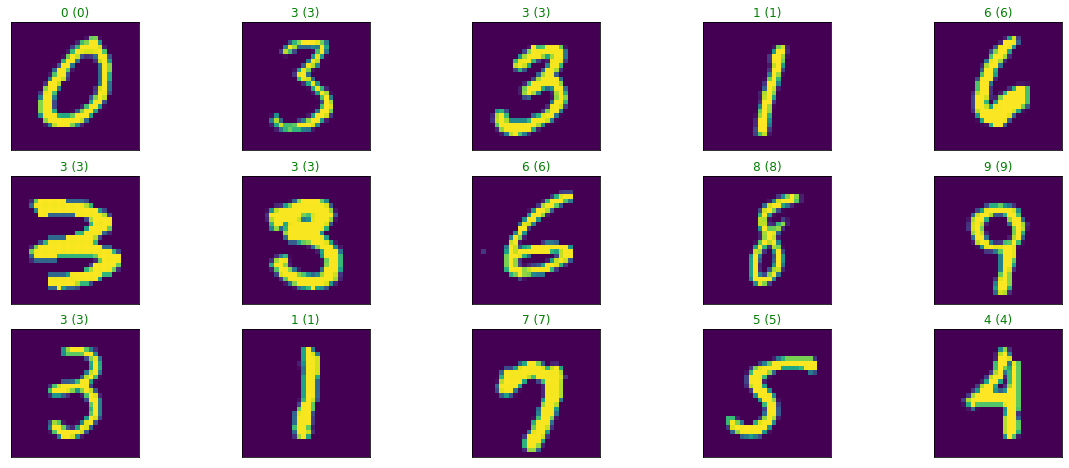

In [0]:
y_hat = model.predict(x_test)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("green" if predict_index == true_index else "red"))